**Import the libraries**

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Loading the dataset**

In [4]:
data = pd.read_csv('/content/data - data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**Drop 'id' column as it is not relevant for the model**

In [5]:
data = data.drop(columns=['id'])

**Check if 'id' column exists before dropping**

In [7]:
if 'id' in data.columns:
    data = data.drop(columns=['id'])

**Convert diagnosis (categorical variable) to numeric (0 for benign, 1 for malignant)**

In [10]:
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

**Split the dataset into features (X) and target (y)**


In [11]:
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

**Split the data into training and testing sets (80% training, 20% testing)**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Initialize the Random Forest Classifier**

In [13]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

**Train the model**

In [14]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Make predictions on the test set**

In [15]:
y_pred = clf.predict(X_test)

**Evaluate the model**

In [16]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

**Print the results**

In [17]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 96.49%
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
 [[70  1]
 [ 3 40]]


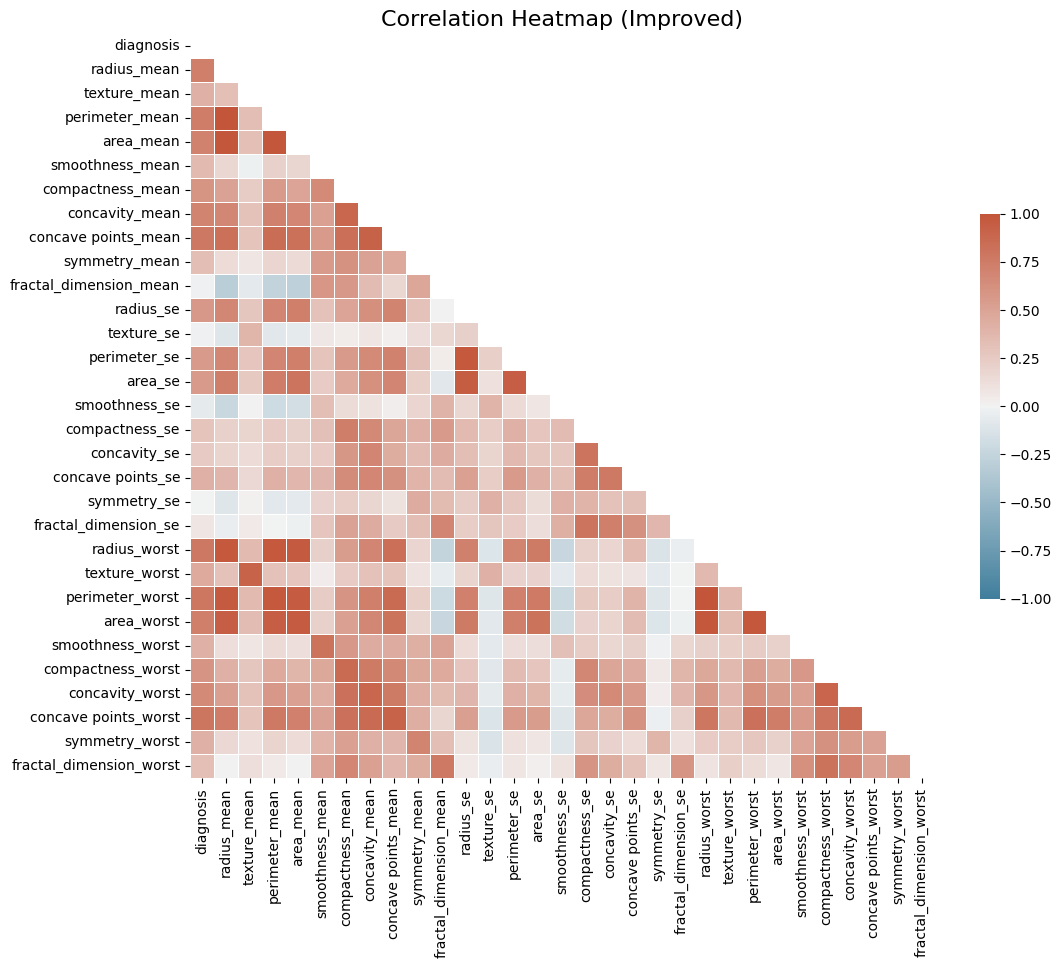

In [20]:
import numpy as np
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data.corr(), mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)
plt.title('Correlation Heatmap (Improved)', fontsize=16)
plt.show()


**Feature Importance Plot**

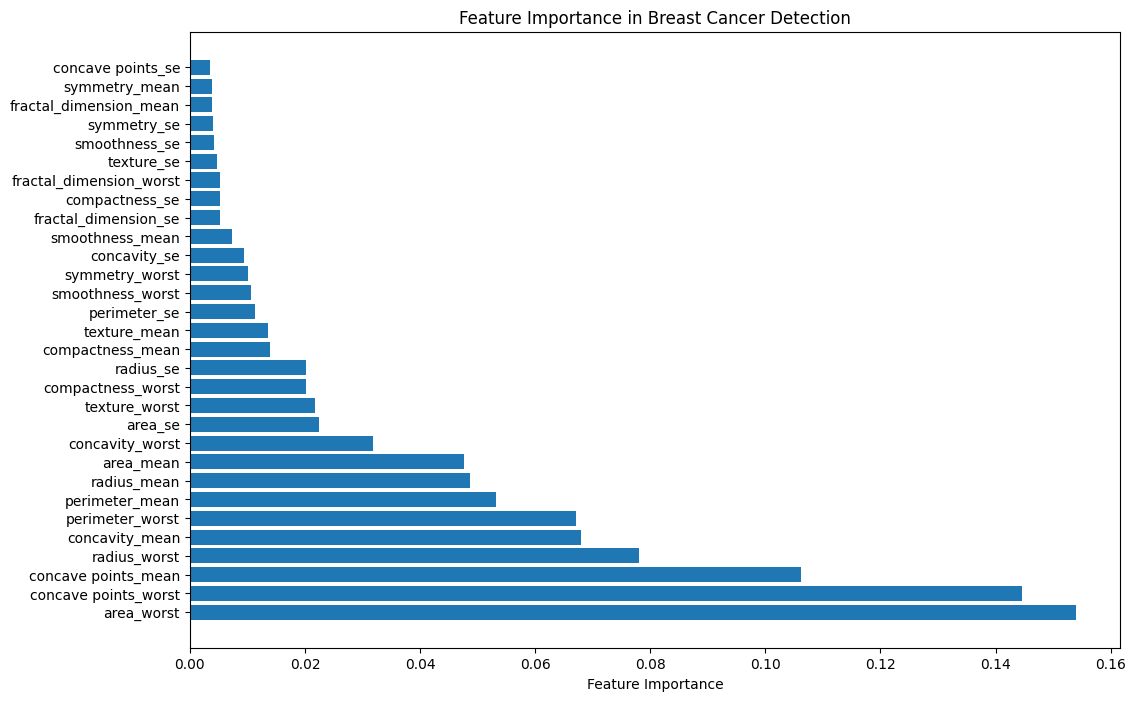

In [21]:
importances = clf.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importance in Breast Cancer Detection")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Feature Importance")
plt.show()


**Confusion Matrix Heatmap using seaborn**

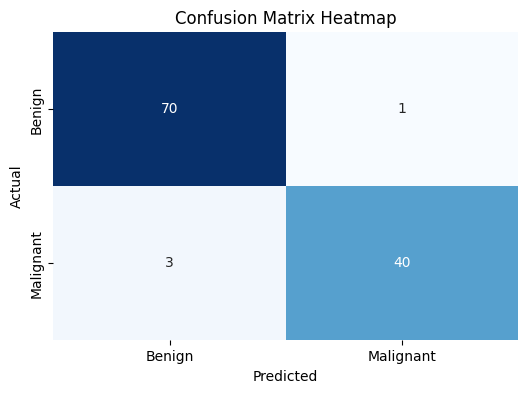

In [22]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Confusion Matrix using ConfusionMatrixDisplay from sklearn**

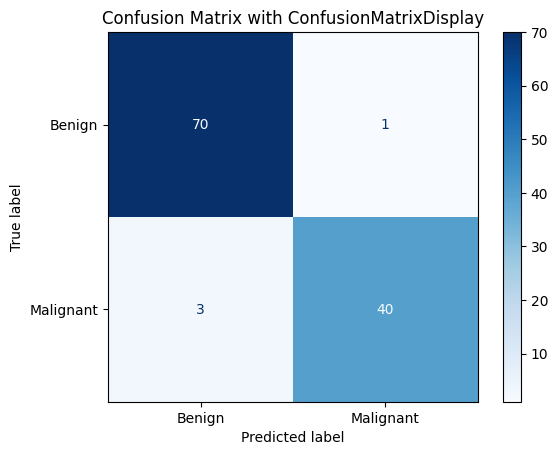

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix with ConfusionMatrixDisplay')
plt.show()